In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Cleaned.csv")

In [3]:
df.set_index('Unnamed: 0', inplace=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

In [6]:
# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

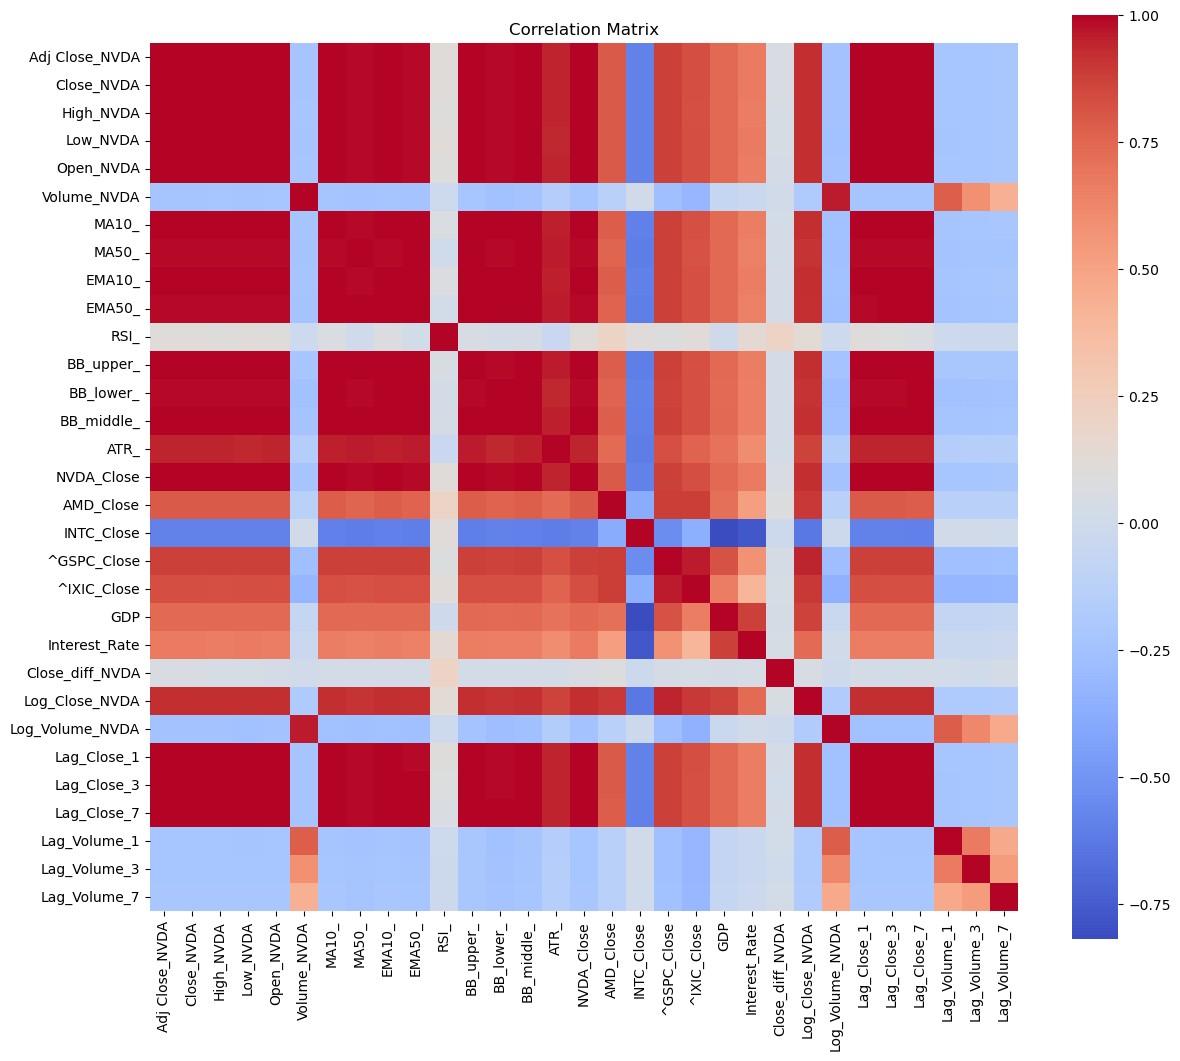

In [7]:
# Plot the correlation matrix

plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Correlation Matrix')

plt.show()

In [8]:
# Identify features strongly correlated with `Close_diff_NVDA`
threshold = 0.5  # Define a threshold for strong correlation
strong_correlations = correlation_matrix['Close_diff_NVDA'][

    correlation_matrix['Close_diff_NVDA'].abs() > threshold

].sort_values(ascending=False)

In [9]:
strong_correlations

Close_diff_NVDA    1.0
Name: Close_diff_NVDA, dtype: float64

In [10]:
# Columns to retain based on analysis
columns_to_retain = [
    'Close_NVDA',       # Target variable
    'Open_NVDA',        # Representative of price dynamics
    'Lag_Close_1',      # Recent trend information
    'Lag_Close_3',      # Slightly longer trend
    'EMA10_',           # Technical indicator
    'MA10_',            # Moving average (short-term)
    'MA50_',            # Moving average (long-term)
    'GDP',              # Macro-level economic influence
    'Interest_Rate',    # Economic factor
    '^GSPC_Close',      # Broad market index
    '^IXIC_Close',      # Tech-heavy market index
    'AMD_Close'         # Sector peer performance
]

In [11]:
filtered_df = df[columns_to_retain]

In [12]:
filtered_df

,Close_NVDA,Open_NVDA,Lag_Close_1,Lag_Close_3,EMA10_,MA10_,MA50_,GDP,Interest_Rate,^GSPC_Close,^IXIC_Close,AMD_Close
Unnamed: 0,,,,,,,,,,,,
2019-12-19,5.886500,5.772500,5.886500,5.886500,5.886500,5.929825,6.363530,21933.217,1.55,3205.370117,8887.219727,42.830002
2019-12-20,5.984250,5.953250,5.886500,5.886500,5.904273,5.929825,6.363530,21933.217,1.55,3221.219971,8924.959961,44.150002
2019-12-21,5.970500,6.013000,5.984250,5.886500,5.916314,5.929825,6.363530,21933.217,1.55,3224.010010,8945.650391,45.459999
2019-12-22,5.970500,6.013000,5.970500,5.886500,5.916314,5.929825,6.363530,21933.217,1.55,3224.010010,8945.650391,45.459999
2019-12-23,5.970500,6.013000,5.970500,5.984250,5.916314,5.929825,6.363530,21933.217,1.55,3224.010010,8945.650391,45.459999
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-14,132.000000,134.179993,134.250000,139.309998,137.353795,138.967999,139.688399,29374.914,4.64,6074.080078,20173.890625,126.690002
2024-12-15,132.000000,134.179993,132.000000,137.339996,137.353795,138.967999,139.688399,29374.914,4.64,6074.080078,20173.890625,126.690002
2024-12-16,132.000000,134.179993,132.000000,134.250000,137.353795,138.967999,139.688399,29374.914,4.64,6074.080078,20173.890625,126.690002


In [13]:
filtered_df.to_csv("Cleaned_reduced.csv")

In [14]:
# Add percentage changes for key features
df['Pct_Change_Close'] = df['Close_NVDA'].pct_change()
df['Pct_Change_Volume'] = df['Volume_NVDA'].pct_change()

In [15]:
window_size = 5  # Define a rolling window size
df['Rolling_Std_Close'] = df['Close_NVDA'].rolling(window_size).std()
df['Rolling_Mean_Close'] = df['Close_NVDA'].rolling(window_size).mean()
df['Rolling_Std_Volume'] = df['Volume_NVDA'].rolling(window_size).std()

In [16]:
for lag in [1, 2, 3, 5]:
    df[f'Lag_Diff_{lag}'] = df['Close_diff_NVDA'].shift(lag)

In [17]:
# Add interaction terms (e.g., high price * volume)
df['High_x_Volume'] = df['High_NVDA'] * df['Volume_NVDA']

In [18]:
# Convert relevant columns to their differenced variations

columns_to_diff = ['High_NVDA', 'Low_NVDA', 'Open_NVDA', 
    'Volume_NVDA', 'Adj Close_NVDA', 'Log_Close_NVDA', 
    '^GSPC_Close', '^IXIC_Close', 'AMD_Close', 'GDP'
]

In [19]:
# Create differenced versions of the specified columns
for col in columns_to_diff:
    df[f'{col}_diff'] = df[col].diff()

In [20]:
df.isna().sum()

Adj Close_NVDA         0
Close_NVDA             0
High_NVDA              0
Low_NVDA               0
Open_NVDA              0
Volume_NVDA            0
MA10_                  0
MA50_                  0
EMA10_                 0
EMA50_                 0
RSI_                   0
BB_upper_              0
BB_lower_              0
BB_middle_             0
ATR_                   0
NVDA_Close             0
AMD_Close              0
INTC_Close             0
^GSPC_Close            0
^IXIC_Close            0
GDP                    0
Interest_Rate          0
Close_diff_NVDA        0
Log_Close_NVDA         0
Log_Volume_NVDA        0
Lag_Close_1            0
Lag_Close_3            0
Lag_Close_7            0
Lag_Volume_1           0
Lag_Volume_3           0
Lag_Volume_7           0
Pct_Change_Close       1
Pct_Change_Volume      1
Rolling_Std_Close      4
Rolling_Mean_Close     4
Rolling_Std_Volume     4
Lag_Diff_1             1
Lag_Diff_2             2
Lag_Diff_3             3
Lag_Diff_5             5


In [21]:
df = df.bfill()

In [22]:
df.isna().sum()

Adj Close_NVDA         0
Close_NVDA             0
High_NVDA              0
Low_NVDA               0
Open_NVDA              0
Volume_NVDA            0
MA10_                  0
MA50_                  0
EMA10_                 0
EMA50_                 0
RSI_                   0
BB_upper_              0
BB_lower_              0
BB_middle_             0
ATR_                   0
NVDA_Close             0
AMD_Close              0
INTC_Close             0
^GSPC_Close            0
^IXIC_Close            0
GDP                    0
Interest_Rate          0
Close_diff_NVDA        0
Log_Close_NVDA         0
Log_Volume_NVDA        0
Lag_Close_1            0
Lag_Close_3            0
Lag_Close_7            0
Lag_Volume_1           0
Lag_Volume_3           0
Lag_Volume_7           0
Pct_Change_Close       0
Pct_Change_Volume      0
Rolling_Std_Close      0
Rolling_Mean_Close     0
Rolling_Std_Volume     0
Lag_Diff_1             0
Lag_Diff_2             0
Lag_Diff_3             0
Lag_Diff_5             0


In [23]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

In [24]:
diff_corr_matrix = numeric_data.corr()
diff_corr_matrix['Close_diff_NVDA'].sort_values(ascending=False)

Close_diff_NVDA        1.000000
Adj Close_NVDA_diff    1.000000
Low_NVDA_diff          0.773094
Pct_Change_Close       0.694480
Log_Close_NVDA_diff    0.693316
High_NVDA_diff         0.636775
^IXIC_Close_diff       0.541825
AMD_Close_diff         0.509878
^GSPC_Close_diff       0.434435
Open_NVDA_diff         0.289419
RSI_                   0.208626
Lag_Diff_2             0.104556
AMD_Close              0.078329
Rolling_Std_Close      0.061730
Close_NVDA             0.057214
NVDA_Close             0.057214
Adj Close_NVDA         0.057206
Log_Close_NVDA         0.054873
Interest_Rate          0.048003
Low_NVDA               0.047175
High_NVDA              0.042148
^IXIC_Close            0.041785
^GSPC_Close            0.040780
GDP                    0.037771
Rolling_Std_Volume     0.034701
Open_NVDA              0.033117
High_x_Volume          0.030940
EMA10_                 0.027973
Rolling_Mean_Close     0.027811
BB_upper_              0.026604
ATR_                   0.026601
MA10_   

In [25]:
selected_features = [
    'Close_diff_NVDA',  # Target variable
    'Low_NVDA_diff',
    'Log_Close_NVDA_diff',
    'High_NVDA_diff',
    '^IXIC_Close_diff',
    'AMD_Close_diff',
    '^GSPC_Close_diff',
    'Open_NVDA_diff'
]

In [26]:
df_selected = df[selected_features]

In [27]:
df_selected

,Close_diff_NVDA,Low_NVDA_diff,Log_Close_NVDA_diff,High_NVDA_diff,^IXIC_Close_diff,AMD_Close_diff,^GSPC_Close_diff,Open_NVDA_diff
Unnamed: 0,,,,,,,,
2019-12-19,0.097750,0.166500,0.016469,0.109750,37.740234,1.320000,15.849854,0.180750
2019-12-20,0.097750,0.166500,0.016469,0.109750,37.740234,1.320000,15.849854,0.180750
2019-12-21,-0.013750,0.025750,-0.002300,0.035500,20.690430,1.309998,2.790039,0.059750
2019-12-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-12-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2024-12-14,-2.250000,-2.119995,-0.016902,-5.200012,247.169922,-0.220001,22.990234,-4.760010
2024-12-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-12-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
df_selected.to_csv("Cleaned_Reduced_Diff")

In [29]:
df.index = pd.to_datetime(df.index)
filtered_df = filtered_df.loc['2022-11-01':]
filtered_df.to_csv("Cleaned_Reduced_post_2022.csv")

In [30]:
df.index = pd.to_datetime(df.index)
df_selected = df_selected.loc['2022-11-01':]
df_selected.to_csv("Cleaned_Reduced_Diff_post_2022.csv")